# Age
---

- [Traffic Violations by Age](#Traffic-Violations-by-Age)
- [Senior Citizens](#Senior-Citizens)
    - [Senior Citizens in New York](#Senior-citizens-in-New-York)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_pickle("clean_data.pkl")

"{:,} traffic tickets".format(len(traffic_tickets))

'5,929,615 traffic tickets'

In [3]:
traffic_tickets.Age.describe().apply(lambda x: format(x, 'f'))

count    5929615.000000
mean          36.699318
std           13.904331
min           16.000000
25%           25.000000
50%           34.000000
75%           47.000000
max           95.000000
Name: Age, dtype: object

In [4]:
traffic_tickets.Age.median()

34.0

In [5]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

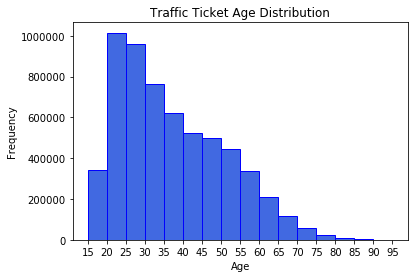

In [6]:
plt.hist(
    traffic_tickets.Age, 
    bins=np.arange(15, 100, 5), 
    color="royalblue", 
    edgecolor="b"
)
plt.title("Traffic Ticket Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axes().set_xticks(np.arange(15, 100, 5))

plt.savefig("age-dist.svg", bbox_inches="tight", pad_inches=0.2, dpi=100)

## Senior Citizens

In [7]:
senior_tickets = traffic_tickets[traffic_tickets.Age >= 65]

In [8]:
senior_tickets.describe()

,Year,Month,Age
count,215351.000000,215351.000000,215351.000000
mean,2015.523907,6.496603,70.443313
std,1.126181,3.306492,5.274482
min,2014.000000,1.000000,65.000000
25%,2015.000000,4.000000,66.000000
50%,2016.000000,6.000000,69.000000
75%,2017.000000,9.000000,73.000000
max,2017.000000,12.000000,95.000000


In [9]:
top_10_senior_violations = senior_tickets.Violation.value_counts()[:10]

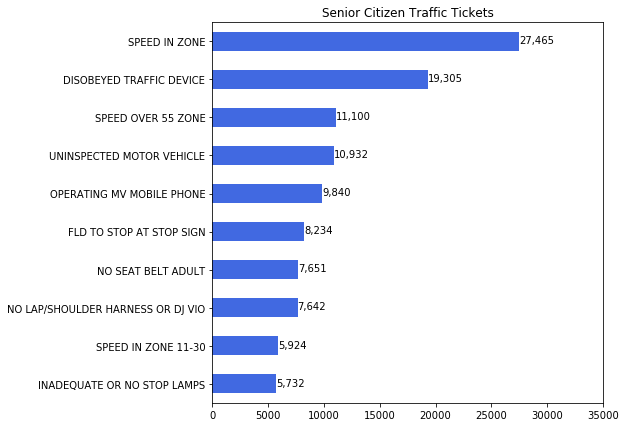

In [10]:
ax = top_10_senior_violations.plot(
    figsize=(7,7),
    kind="barh",     
    title="Senior Citizen Traffic Tickets",     
    color="royalblue")
ax.set_xlim(0, 35000)
ax.invert_yaxis()

for i, v in enumerate(top_10_senior_violations):
    plt.text(v, i+.05, '{:,}'.format(v))

## Senior-citizens in New York

In [11]:
total_senior_tickets = len(senior_tickets)
total_ny_senior_tickets = senior_tickets.StateOfLicense.value_counts()['NEW YORK']

print("Total Senior Tickets: {0:,} \n \
    \rTotal NY Senior Tickets: {1:,} \n \
    \rSenior Tickets Outside NY: {2:,} \n".format(
    total_senior_tickets,
    total_ny_senior_tickets,
    total_senior_tickets - total_ny_senior_tickets
))

print("{0}% of senior-citizens ticketed between 2014 and 2017 have New York licenses.".format(
    round(total_ny_senior_tickets / total_senior_tickets * 100, 2)
))

Total Senior Tickets: 215,351 
Total NY Senior Tickets: 186,142 
Senior Tickets Outside NY: 29,209 

86.44% of senior-citizens ticketed between 2014 and 2017 have New York licenses.


In [12]:
ny_senior_tickets = senior_tickets[senior_tickets.StateOfLicense == 'NEW YORK']

len(ny_senior_tickets)

186142

In [13]:
top_ny_senior_ticketers = ny_senior_tickets.PoliceAgency.value_counts()[:20]

top_ny_senior_ticketers

NYC POLICE DEPT                   51640
SUFFOLK COUNTY POLICE DEPT         3866
BUFFALO POLICE DEPT                2576
AMHERST TOWN POLICE DEPT           2423
NASSAU COUNTY POLICE DEPT          2254
GREAT NECK ESTATES POLICE DEPT     1794
FREEPORT VILLAGE POLICE DEPT       1723
TROOP G HQTRS STATE POLICE         1682
HARRISON POLICE DEPT               1609
BATAVIA STATE POLICE               1511
HAMBURG TOWN POLICE DEPT           1491
CANANDAIGUA STATE POLICE           1404
ERIE COUNTY SHERIFF                1377
CLAVERACK STATE POLICE             1239
BUFFALO TWAY STATE POLICE          1203
MONROE COUNTY SHERIFF              1183
ALBANY TWAY STATE POLICE           1176
PAINTED POST STATE POLICE          1145
GREENBURGH TOWN POLICE DEPT        1105
CHEEKTOWAGA POLICE DEPT            1087
Name: PoliceAgency, dtype: int64

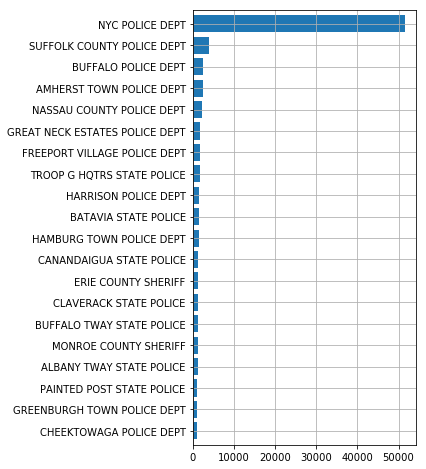

In [14]:
ax = top_ny_senior_ticketers.plot(
    kind="barh", 
    figsize=(4,8), 
    width=0.8,
    grid=True
)

ax.invert_yaxis()


In [15]:
nyc_senior_tickets = ny_senior_tickets[ny_senior_tickets.PoliceAgency == "NYC POLICE DEPT"]

len(nyc_senior_tickets)

51640

In [16]:
nyc_senior_tickets.Violation.value_counts()[:10]

DISOBEYED TRAFFIC DEVICE             8268
NO LAP/SHOULDER HARNESS OR DJ VIO    5886
OPERATING MV MOBILE PHONE            4685
SPEED IN ZONE 11-30                  4654
FLD YIELD PEDEST NYC                 3355
NYC REDLIGHT                         2353
FLD TO STOP AT STOP SIGN             2155
IMPROPER TURN                        1750
IMPROPER SIGNAL                      1584
OPERATING W/O INSURANCE              1552
Name: Violation, dtype: int64